In [1]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
def f(x, y):
    return x**2 + x*y + y*2 + 1

In [3]:
xl = np.linspace(-1.5, 1.5, 101)

In [4]:
X, Y = np.meshgrid(xl, xl)
Z = f(X, Y)

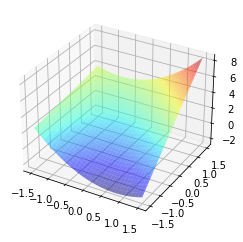

In [5]:
axe = plt.axes(projection='3d')
axe.plot_surface(X, Y, Z, cmap='jet', alpha=0.5)

In [6]:
t = np.linspace(0, 1, 1001)

In [7]:
xt = t**2*np.cos(2*np.pi*t**2)
yt = t**3*np.sin(2*np.pi*t**3)

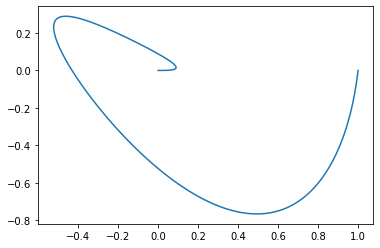

In [8]:
fig, axe = plt.subplots()
axe.plot(xt, yt)

In [9]:
XY = np.stack([X.ravel(), Y.ravel()]).T

In [10]:
S = interpolate.LinearNDInterpolator(XY, Z.ravel())

In [11]:
xyt = np.stack([xt, yt]).T

In [12]:
St = S(xyt)

In [13]:
Sd = np.cumsum(np.sqrt(np.sum(np.diff(xyt, axis=0)**2, axis=1)))

In [14]:
I = np.trapz(St[:-1], Sd)
I

2.040149329274806

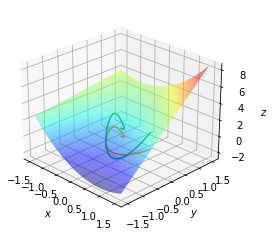

In [15]:
axe = plt.axes(projection='3d')
axe.plot_surface(X, Y, Z, cmap='jet', alpha=0.5)
axe.plot(xt, yt, 0)
axe.plot(xt, yt, St)
axe.set_xlabel("$x$")
axe.set_ylabel("$y$")
axe.set_zlabel("$z$")
axe.view_init(elev=25, azim=-45)

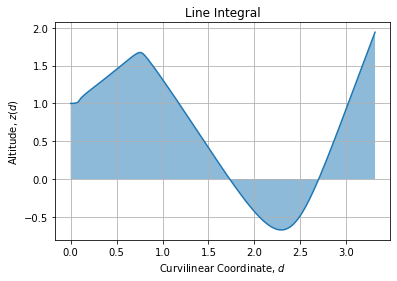

In [16]:
fig, axe = plt.subplots()
axe.plot(Sd, St[:-1])
axe.fill_between(Sd, St[:-1], alpha=0.5)
axe.set_xlabel("Curvilinear Coordinate, $d$")
axe.set_ylabel("Altitude, $z(d)$")
axe.set_title("Line Integral")
axe.grid()